In [1]:
import pydicom
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import seaborn as sns
from os import listdir

In [2]:
dir_dcm = "pydicom_examples/"

In [3]:
example1 = pydicom.dcmread(dir_dcm +"ID_00008ce3c.dcm")
print(example1)

(0008, 0018) SOP Instance UID                    UI: ID_00008ce3c
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_ce8a3cd2'
(0020, 000d) Study Instance UID                  UI: ID_974735bf79
(0020, 000e) Series Instance UID                 UI: ID_3780d48b28
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-125', '-83.0468112', '175.995344']
(0020, 0037) Image Orientation (Patient)         DS: ['1', '0', '0', '0', '0.994521895', '0.104528463']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.48828125', '0.48828125']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         U

In [4]:
examples_dcm = listdir(dir_dcm)

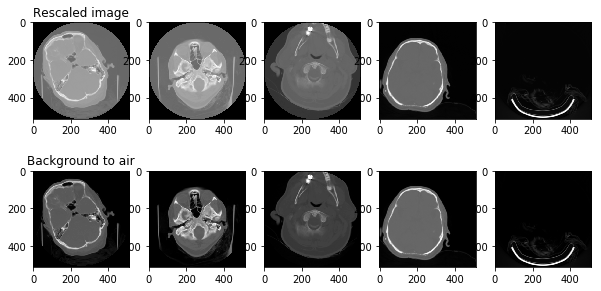

In [5]:
fig, ax = plt.subplots(2,5,figsize=(10,5))
for n in range(5):
    dataset = pydicom.dcmread(dir_dcm + examples_dcm[n])
    image = dataset.pixel_array
    rescaled_image = image * dataset.RescaleSlope + dataset.RescaleIntercept
   
    ax[0,n].imshow(rescaled_image,cmap='gray')
    rescaled_image[rescaled_image < -1000] = -1001
    ax[1,n].imshow(rescaled_image,cmap='gray')
    ax[0,0].set_title("Rescaled image")    
    ax[1,0].set_title("Background to air");
   

In [6]:
def crop_image(img,tol=-1):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

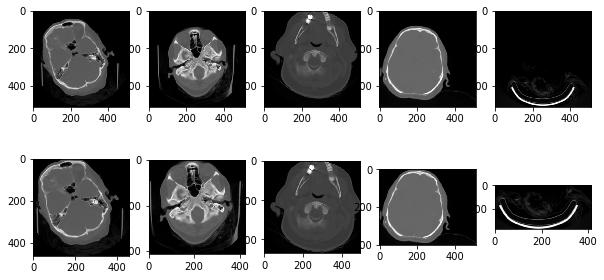

In [7]:
#show some images from the subset_2000: list200a_dcm 
fig, ax = plt.subplots(2,5,figsize=(10,5))
for n in range(5):
    dataset = pydicom.dcmread(dir_dcm + examples_dcm[n])
    image = dataset.pixel_array
    rescaled_image = image * dataset.RescaleSlope + dataset.RescaleIntercept
    rescaled_image[rescaled_image < -1000] = -1001
    ax[0,n].imshow(rescaled_image,cmap='gray')
    img_1000=crop_image(rescaled_image,tol=-900)
    ax[1,n].imshow(img_1000,cmap='gray')
    

In [8]:
#window used to convert the images in png #originally in
#https://www.kaggle.com/omission/eda-view-dicom-images-with-correct-windowing 
def window_image(img, window_center,window_width, intercept, slope):
    img = (img*slope +intercept)
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img

def get_first_of_dicom_field_as_int(x):
#get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)
    
def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
    data[('0028','1051')].value, #window width
    data[('0028','1052')].value, #intercept
    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]


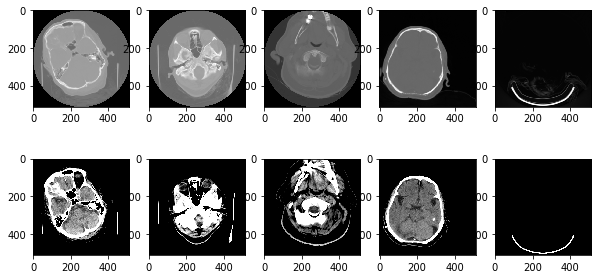

In [9]:
#view one example
fig, ax = plt.subplots(2,5,figsize=(10,5))
for n in range(5):
    dataset = pydicom.dcmread(dir_dcm + examples_dcm[n])
    image = dataset.pixel_array
    window_center , window_width, intercept, slope = get_windowing(dataset)
    image_windowed = window_image(image, window_center, window_width, intercept, slope)
    
    ax[0,n].imshow(image,cmap='gray')
    ax[1,n].imshow(image_windowed,cmap='gray')
